In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import cv2
import json

In [15]:
train_annotation_path = '/kaggle/input/openforensics-data/Train_poly.json'
valid_annotation_path = '/kaggle/input/openforensics-data/Val_poly.json'

with open(train_annotation_path, 'r') as file:
    train_annotation = json.load(file)
with open(valid_annotation_path, 'r') as file:
    valid_annotation = json.load(file)

In [16]:
train_annotation.keys()

dict_keys(['categories', 'images', 'annotations'])

In [17]:
list(train_annotation['categories'])

[{'id': 0, 'name': 'Real'}, {'id': 1, 'name': 'Fake'}]

In [18]:
pd.DataFrame(train_annotation['categories'])

,id,name
0,0,Real
1,1,Fake


In [19]:
list(train_annotation['images'])[:3]

[{'id': 0,
  'file_name': 'Images/Train/9c541c578f.jpg',
  'width': 1024,
  'height': 847},
 {'id': 1,
  'file_name': 'Images/Train/e44ef213aa.jpg',
  'width': 1024,
  'height': 683},
 {'id': 2,
  'file_name': 'Images/Train/8ded94d4df.jpg',
  'width': 1024,
  'height': 768}]

In [21]:
train_images_df = pd.DataFrame(train_annotation['images'])
train_images_df.rename(columns={'file_name': 'file_path'}, inplace=True)
train_images_df['file_name'] = train_images_df['file_path'].str.split('/').str[-1]
train_images_df

,id,file_path,width,height,file_name
0,0,Images/Train/9c541c578f.jpg,1024,847,9c541c578f.jpg
1,1,Images/Train/e44ef213aa.jpg,1024,683,e44ef213aa.jpg
2,2,Images/Train/8ded94d4df.jpg,1024,768,8ded94d4df.jpg
3,3,Images/Train/85ce8a2508.jpg,768,1024,85ce8a2508.jpg
4,4,Images/Train/273ee16b8d.jpg,683,1024,273ee16b8d.jpg
...,...,...,...,...,...
44092,44092,Images/Train/bc7d7fe33f.jpg,768,1024,bc7d7fe33f.jpg
44093,44093,Images/Train/28479abd34.jpg,1024,845,28479abd34.jpg
44094,44094,Images/Train/7dfbef6d41.jpg,678,1024,7dfbef6d41.jpg
44095,44095,Images/Train/5dbdcaec11.jpg,1024,680,5dbdcaec11.jpg


In [22]:
train_annotation_df = pd.DataFrame(train_annotation['annotations'])
train_annotation_df

,id,image_id,iscrowd,area,category_id,bbox,segmentation
0,0,0,0,13661,1,"[458, 237, 134, 131]","[[496, 237, 488, 238, 483, 241, 481, 241, 475,..."
1,1,1,0,9619,1,"[380, 229, 111, 118]","[[412, 229, 407, 230, 403, 231, 398, 232, 393,..."
2,2,1,0,9707,1,"[596, 235, 107, 115]","[[612, 235, 608, 236, 606, 237, 600, 243, 599,..."
3,3,2,0,25865,1,"[527, 195, 170, 187]","[[609, 195, 579, 196, 549, 197, 532, 198, 530,..."
4,4,3,0,55439,1,"[235, 250, 246, 279]","[[298, 250, 293, 251, 287, 252, 284, 253, 282,..."
...,...,...,...,...,...,...,...
150861,150861,44095,0,4506,0,"[410, 96, 72, 117]","[[474, 124, 472, 125, 462, 135, 455, 135, 451,..."
150862,150862,44095,0,3188,0,"[554, 63, 50, 78]","[[568, 63, 566, 64, 564, 65, 562, 67, 561, 70,..."
150863,150863,44096,0,9750,1,"[141, 116, 92, 124]","[[172, 117, 160, 117, 157, 118, 154, 119, 152,..."
150864,150864,44096,0,6685,1,"[384, 203, 76, 106]","[[436, 203, 425, 205, 413, 205, 398, 205, 394,..."


In [23]:
train_annotation_df['category_id'].value_counts()

category_id
0    85006
1    65860
Name: count, dtype: int64

In [51]:
# Images that are present in Train part 5 folder
train_img_folder = '/kaggle/input/openforensics-data/Train_part_5/Train'
train_images_df[train_images_df['file_name'].isin(os.listdir(train_img_folder))]

,id,file_path,width,height,file_name
2,2,Images/Train/8ded94d4df.jpg,1024,768,8ded94d4df.jpg
8,8,Images/Train/58bdd8c694.jpg,768,1024,58bdd8c694.jpg
17,17,Images/Train/4dd0e496f8.jpg,826,1024,4dd0e496f8.jpg
24,24,Images/Train/c4a3ac8c2b.jpg,683,1024,c4a3ac8c2b.jpg
27,27,Images/Train/17bcd1aa35.jpg,966,1024,17bcd1aa35.jpg
...,...,...,...,...,...
44078,44078,Images/Train/dc20b83d43.jpg,1024,683,dc20b83d43.jpg
44079,44079,Images/Train/b386088c08.jpg,1024,764,b386088c08.jpg
44082,44082,Images/Train/6b26ed5fdb.jpg,768,914,6b26ed5fdb.jpg
44090,44090,Images/Train/bf5b8ff524.jpg,1024,768,bf5b8ff524.jpg


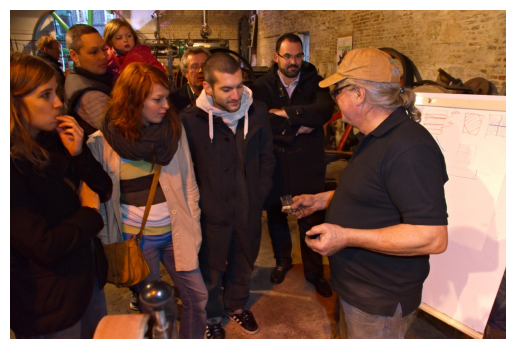

In [52]:
# image_id = 26981
sample_img = cv2.imread(os.path.join(train_img_folder, '5dbdcaec11.jpg'))
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
plt.imshow(sample_img)
plt.axis('off')
plt.show()

In [ ]:
# Images that contain most faces
train_annotation_df['image_id'].value_counts().to_frame().reset_index()

# Visualizing Image

In [107]:
# Get a sample image that contains more than 1 face for visualization purposes
# sample_image_id = 44095
# sample_image_id = 6015
sample_image_id = 6020
train_annotation_df[train_annotation_df['image_id'] == sample_image_id]

,id,image_id,iscrowd,area,category_id,bbox,segmentation
13517,13517,6020,0,3312,1,"[348, 287, 58, 78]","[[382, 287, 350, 303, 348, 317, 348, 326, 349,..."
13518,13518,6020,0,7478,0,"[488, 161, 89, 111]","[[544, 161, 540, 162, 535, 163, 532, 165, 529,..."
13519,13519,6020,0,4848,0,"[662, 215, 79, 92]","[[719, 215, 719, 220, 722, 225, 722, 228, 723,..."


In [108]:
# Get the filename of a certain image id
train_images_df[train_images_df['id'] == sample_image_id]['file_name'].iloc[0]

'35739d5e11.jpg'

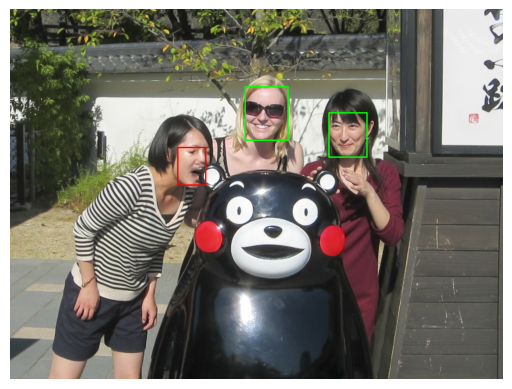

Image is found in Train part 1


In [109]:
# Visualize all bounding boxes of a sample image
for idx in range(1, 6):
    try:
        train_img_folder = f'/kaggle/input/openforensics-data/Train_part_{idx}/Train'
        sample_filename = train_images_df[train_images_df['id'] == sample_image_id]['file_name'].iloc[0]
        sample_img = cv2.imread(os.path.join(train_img_folder, sample_filename))
        sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
        for i, row in train_annotation_df[train_annotation_df['image_id'] == sample_image_id].iterrows():
            x, y, w, h = row['bbox']
            green = (0, 255, 0)
            red = (255, 0, 0)
            color = green if row['category_id'] == 0 else red
            cv2.rectangle(sample_img, (x, y), (x + w, y + h), color, 2)
        plt.imshow(sample_img)
        plt.axis('off')
        save_path = f"sample_image_{sample_image_id}.png"
        plt.savefig(save_path, bbox_inches='tight')
        plt.show()
        print(f'Image is found in Train part {idx}')
        break
    except:
        continue

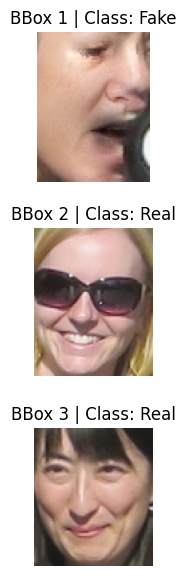

Image is found in Train part 1


In [111]:
fig, axes = plt.subplots(nrows=len(train_annotation_df[train_annotation_df['image_id'] == sample_image_id]), 
                         ncols=1, figsize=(2, 2 * len(train_annotation_df[train_annotation_df['image_id'] == sample_image_id])))
fig.tight_layout()

for idx in range(1, 6):
    try:
        train_img_folder = f'/kaggle/input/openforensics-data/Train_part_{idx}/Train'
        sample_filename = train_images_df[train_images_df['id'] == sample_image_id]['file_name'].iloc[0]
        sample_img_path = os.path.join(train_img_folder, sample_filename)
        sample_img = cv2.imread(sample_img_path)
        sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
        annotations = train_annotation_df[train_annotation_df['image_id'] == sample_image_id]
            
        # Loop through all bounding boxes
        for i, (index, row) in enumerate(annotations.iterrows()):
            x, y, w, h = row['bbox']
            cropped_img = sample_img[y:y+h, x:x+w]  # Crop the bounding box

            class_name = 'Real' if row['category_id'] == 0 else 'Fake'
            axes[i].imshow(cropped_img)
            axes[i].axis('off')
            axes[i].set_title(f'BBox {i+1} | Class: {class_name}')
        save_path = f"sample_image_{sample_image_id}_bboxes.png"
        plt.savefig(save_path, bbox_inches='tight')
        plt.show()
            
        print(f'Image is found in Train part {idx}')
        break
    except:
        continue